# Customer Engagement with Categories
Driving question:
Which categories are each of my customers engaged with? Where are the oppurtunities?

What would be really nice to know is for each customer the categories they are engaged with, and those that they are not, and the opportunity that exists to increase their spend in various categories.

* What items are the most popular on weekends vs weekdays.
* Investigate what categories are the most popular among range of spending categories.
* What are the differences in engagement in categories of customers from different branches.
* What categories are performing well, in terms of revenue, and which are lagging behind (by date, by location). We can try to identify categories are performing well or poorly to improve consumer engagement.

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.plotly as py
import plotly
import plotly.graph_objs as go
df = pd.read_csv('massy-transactions-noindex-deptdesc.csv', usecols=[
    'transaction_number',
    'invoice_number',
    'customer_id',
    'transaction_mode',
    'start_date',
    'end_date',
    'movement_start_time',
    'item_cost',
    'item_qty',
    'item_name',
    'department_description',
    'subdepartment_description',
    'location'
])
plt.rcParams["figure.dpi"] = 100

Only use normal sale transactions.

In [4]:
df = df[(df['transaction_mode'] == 'SALE') & (df['start_date'] == df['end_date'])]

We will separate the transactions into two categories, weekend and weekday,
and analyse the differences between these two groups.

In [5]:
NUMBER_OF_WEEKDAYS = 5
df['weekday'] = pd.to_datetime(df['start_date']).dt.weekday
df['weekend'] = df['weekday'] > NUMBER_OF_WEEKDAYS - 1
df.loc[df['weekend'] == True]

,transaction_number,transaction_mode,start_date,end_date,movement_start_time,invoice_number,customer_id,item_name,item_cost,item_qty,location,department_description,subdepartment_description,weekday,weekend
1667,10005,SALE,2018-01-21,2018-01-21,08:17:02,9788.0,4.210009e+10,JOHNNIE WALKER BLACK 2 GLASS SET 2017 75,235.00,1,marabella,ALCOHOLIC BEVERAGES,WHISKEY,6,True
1668,10005,SALE,2018-01-21,2018-01-21,08:17:02,9788.0,4.210009e+10,BREEZE MULTIACTIVE POWDER BAG 4 KG,89.95,1,marabella,GROCERY (NON-FOOD),LAUNDRY,6,True
1669,10005,SALE,2018-01-21,2018-01-21,08:17:02,9788.0,4.210009e+10,BREEZE MULTIACTIVE POWDER BAG 4 KG,89.95,1,marabella,GROCERY (NON-FOOD),LAUNDRY,6,True
1670,10006,SALE,2018-01-21,2018-01-21,08:20:05,9789.0,4.210027e+10,GLASS PLUS GLASS CLEANER 32 OZ,24.66,1,marabella,GROCERY (NON-FOOD),HOUSEHOLD CLEANING,6,True
1671,10006,SALE,2018-01-21,2018-01-21,08:20:05,9789.0,4.210027e+10,RHINO LARGE BLACK GARBAGE BAGS ROL 30 CT,21.33,1,marabella,GROCERY (NON-FOOD),DISP/ALUMINUM/PLASTIC,6,True
1672,10006,SALE,2018-01-21,2018-01-21,08:20:05,9789.0,4.210027e+10,RHINO LARGE BLACK GARBAGE BAGS ROL 30 CT,21.33,1,marabella,GROCERY (NON-FOOD),DISP/ALUMINUM/PLASTIC,6,True
1673,10006,SALE,2018-01-21,2018-01-21,08:20:05,9789.0,4.210027e+10,CLOROX BLEACH 4 L,32.01,1,marabella,GROCERY (NON-FOOD),LAUNDRY,6,True
1674,10006,SALE,2018-01-21,2018-01-21,08:20:05,9789.0,4.210027e+10,BERMUDEZ CRIX TRIPACK MULTIGRAIN 9 OZ,15.52,1,marabella,SNACKS AND CONFECTIONERY,BISCUITS COOKIES/CRACKERS,6,True
1675,10006,SALE,2018-01-21,2018-01-21,08:20:05,9789.0,4.210027e+10,BERMUDEZ CRIX TRIPACK MULTIGRAIN 9 OZ,15.52,1,marabella,SNACKS AND CONFECTIONERY,BISCUITS COOKIES/CRACKERS,6,True
1676,10006,SALE,2018-01-21,2018-01-21,08:20:05,9789.0,4.210027e+10,PORTUGALS CT,12.12,1,marabella,PRODUCE,FRUITS,6,True


In [10]:
dep_by_weekend = df.groupby(['department_description', 'weekend'],
                     as_index=False,
                     sort=False)['item_qty', 'item_cost'].sum()

In [5]:
def per_day(df, col, new_name):
    df[new_name] = np.where(df['weekend'],
                            df[col] / (7 - NUMBER_OF_WEEKDAYS),
                            df[col] / NUMBER_OF_WEEKDAYS)
    return df
dep_by_weekend = per_day(dep_by_weekend, 'item_qty', 'quantity_per_day')
dep_by_weekend = per_day(dep_by_weekend, 'item_cost', 'revenue_per_day')

In [6]:
dep_by_weekend

,department_description,weekend,item_qty,item_cost,quantity_per_day,revenue_per_day
0,BAKERY,False,302451,3.130128e+06,60490.2,6.260255e+05
1,PRODUCE,False,589825,7.964900e+06,117965.0,1.592980e+06
2,DAIRY & CHILLED PRODUCTS,False,342456,7.026077e+06,68491.2,1.405215e+06
3,FROZEN FOODS,False,79147,2.814928e+06,15829.4,5.629856e+05
4,MEATS & SEAFOOD,False,215056,6.624249e+06,43011.2,1.324850e+06
5,SNACKS AND CONFECTIONERY,False,734113,6.816860e+06,146822.6,1.363372e+06
6,GROCERY (FOOD),False,1945161,2.254670e+07,389032.2,4.509340e+06
7,GROCERY (NON-FOOD),False,312714,7.109722e+06,62542.8,1.421944e+06
8,PHONE CARDS,False,274531,1.218964e+06,54906.2,2.437927e+05
9,GENERAL MERCHANDISE,False,83539,1.115606e+06,16707.8,2.231212e+05


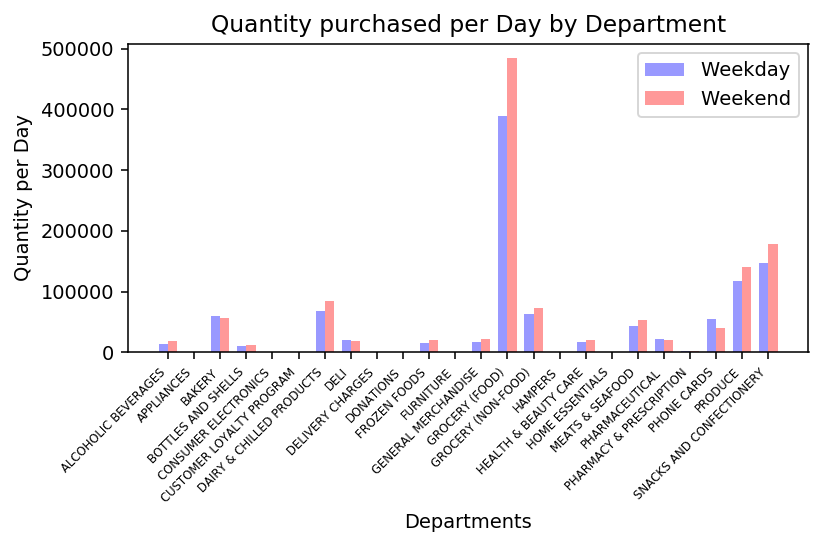

In [7]:
weekend_data = dep_by_weekend.loc[dep_by_weekend['weekend'] == True].sort_values('department_description')
weekday_data = dep_by_weekend.loc[dep_by_weekend['weekend'] == False].sort_values('department_description')

n_groups = weekday_data['quantity_per_day'].size

fig, ax = plt.subplots(dpi=140)

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4

rects1 = ax.bar(index, weekday_data['quantity_per_day'], bar_width,
                alpha=opacity, color='b',
                label='Weekday')

rects2 = ax.bar(index + bar_width, weekend_data['quantity_per_day'], bar_width,
                alpha=opacity, color='r',
                label='Weekend')

ax.set_xlabel('Departments')
ax.set_ylabel('Quantity per Day')
ax.set_title('Quantity purchased per Day by Department')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(weekend_data['department_description'], fontdict={'fontsize' : 6},
                   rotation=45, ha='right')
ax.legend()

fig.tight_layout()
plt.savefig("LOYALTY QUANTITY PER DAY BY DEPARTMENT")

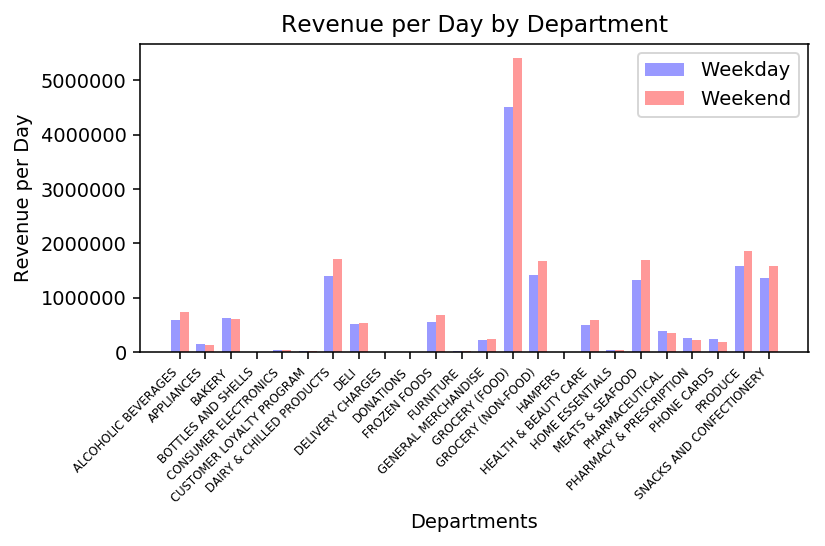

In [8]:
weekend_data = dep_by_weekend.loc[dep_by_weekend['weekend'] == True].sort_values('department_description')
weekday_data = dep_by_weekend.loc[dep_by_weekend['weekend'] == False].sort_values('department_description')

n_groups = weekday_data['revenue_per_day'].size

fig, ax = plt.subplots(dpi=140)

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4

rects1 = ax.bar(index, weekday_data['revenue_per_day'], bar_width,
                alpha=opacity, color='b',
                label='Weekday')

rects2 = ax.bar(index + bar_width, weekend_data['revenue_per_day'], bar_width,
                alpha=opacity, color='r',
                label='Weekend')

ax.set_xlabel('Departments')
ax.set_ylabel('Revenue per Day')
ax.set_title('Revenue per Day by Department')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(weekend_data['department_description'], fontdict={'fontsize' : 6},
                   rotation=45, ha='right')
ax.legend()

fig.tight_layout()
plt.savefig("LOYALTY REV PER DAY BY DEPARTMENT")

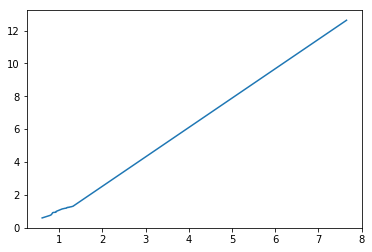

45    0.605023
37    0.785759
42    0.817420
36    0.849342
41    0.873701
35    0.922941
31    0.929302
29    0.972776
30    1.066115
24    1.118033
34    1.131804
21    1.165820
22    1.167491
20    1.176643
27    1.189355
25    1.192410
46    1.197375
23    1.197860
26    1.226090
32    1.227067
19    1.234665
28    1.281446
33    1.319015
47    7.651515
Name: revenue_per_day, dtype: float64
45     0.592105
37     0.744042
41     0.788043
42     0.912682
31     0.927600
29     0.935871
30     0.987735
46     1.036585
36     1.135787
27     1.168656
20     1.176466
22     1.185928
33     1.195016
21     1.218971
25     1.222044
26     1.227326
35     1.228705
28     1.231888
32     1.237571
23     1.243628
34     1.250000
24     1.274495
19     1.302942
47    12.625000
Name: quantity_per_day, dtype: float64


In [9]:
revenue_ratios = np.divide(weekend_data['revenue_per_day'], weekday_data['revenue_per_day']).sort_values()
quantity_ratios = np.divide(weekend_data['quantity_per_day'], weekday_data['quantity_per_day']).sort_values()
plt.plot(revenue_ratios, quantity_ratios)
plt.show()
print(revenue_ratios)
print(quantity_ratios)

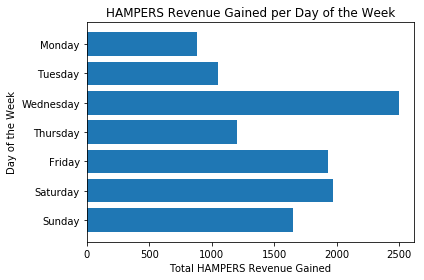

In [10]:
dep_by_weekday = (df.groupby(['department_description', 'weekday'], as_index=False, sort=False)
                       ['item_qty', 'item_cost'].sum())
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
def dept_by_weekday_breakdown(dept):
    grocery_by_weekday = (dep_by_weekday.loc[dep_by_weekday['department_description'] == dept]
                             .sort_values('weekday', ascending=False))
    grocery_by_weekday['weekday'] = grocery_by_weekday['weekday'].map(dayOfWeek)

    fig, ax = plt.subplots()
    plt.barh(range(len(grocery_by_weekday['weekday'])),grocery_by_weekday['item_cost'])
    plt.yticks(range(len(grocery_by_weekday['weekday'])),grocery_by_weekday['weekday'])
    ax.set(xlabel='Total ' + dept + ' Revenue Gained',
           ylabel='Day of the Week',
           title=dept + ' Revenue Gained per Day of the Week')
    fig.tight_layout()
    plt.show()

dept_by_weekday_breakdown('HAMPERS')

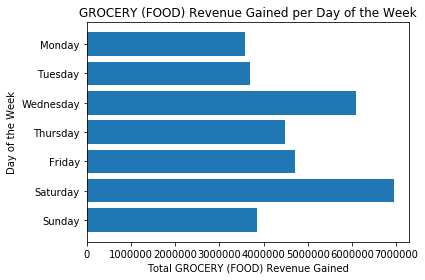

In [11]:
dept_by_weekday_breakdown('GROCERY (FOOD)')

Times when purchases are done, Time of day, Day of week as column rows is hourly interval. Heat map.

In [12]:
idx = dep_by_weekday.groupby(['department_description'],
                             sort=False)['item_cost'].transform(max) == dep_by_weekday['item_cost']
dep_by_weekday[idx]

,department_description,weekday,item_qty,item_cost
8,PHONE CARDS,2,69692,3.423448e+05
14,FURNITURE,2,221,4.454378e+04
15,APPLIANCES,2,310,2.437945e+05
17,PHARMACEUTICAL,2,30609,5.555925e+05
18,CUSTOMER LOYALTY PROGRAM,2,301,2.817000e+04
90,GROCERY (FOOD),5,625184,6.950889e+06
92,GROCERY (NON-FOOD),5,96485,2.161327e+06
93,DAIRY & CHILLED PRODUCTS,5,108597,2.225566e+06
94,MEATS & SEAFOOD,5,72351,2.294046e+06
95,PRODUCE,5,181920,2.403921e+06


In [13]:
idx = dep_by_weekday.groupby(['department_description'],
                             sort=False)['item_cost'].transform(min) == dep_by_weekday['item_cost']
dep_by_weekday[idx]

,department_description,weekday,item_qty,item_cost
29,BAKERY,6,40249,4.257706e+05
31,PHARMACEUTICAL,6,13717,2.558786e+05
33,BOTTLES AND SHELLS,6,9495,1.383600e+03
52,FURNITURE,6,108,1.871439e+04
53,PHONE CARDS,6,28804,1.317946e+05
56,APPLIANCES,4,227,1.062596e+05
57,CONSUMER ELECTRONICS,4,52,2.008004e+04
73,HOME ESSENTIALS,3,868,3.519551e+04
78,PRODUCE,1,94665,1.236155e+06
83,DAIRY & CHILLED PRODUCTS,1,56950,1.167355e+06


In [3]:
df['hour']=df['movement_start_time'].map(str).map(lambda x: x[:2]+":00")
df


,transaction_number,transaction_mode,start_date,end_date,movement_start_time,invoice_number,customer_id,item_name,item_cost,item_qty,location,department_description,subdepartment_description,hour
41,11152,SALE,2018-01-24,2018-01-24,10:30:57,10905.0,4.21001e+10,BAKERY CURRANTS ROLLS CT,24.00,4,marabella,BAKERY,SWEET/SAVOURY BAKED GOODS,10:00
42,11152,SALE,2018-01-24,2018-01-24,10:30:57,10905.0,4.21001e+10,CARROTS PREPACK CT,8.50,1,marabella,PRODUCE,VEGETABLES,10:00
43,11152,SALE,2018-01-24,2018-01-24,10:30:57,10905.0,4.21001e+10,CAULIFLOWER LOCAL KG,13.28,1,marabella,PRODUCE,VEGETABLES,10:00
44,11152,SALE,2018-01-24,2018-01-24,10:30:57,10905.0,4.21001e+10,EMERALD BUTTER UNSALTED 250 G,26.00,1,marabella,DAIRY & CHILLED PRODUCTS,MARGARINE/BUTTER,10:00
45,11152,SALE,2018-01-24,2018-01-24,10:30:57,10905.0,4.21001e+10,HAAGEN DAZS DULCE DE LECHE 1 PT,50.99,1,marabella,FROZEN FOODS,ICECREAM/DESSERTS,10:00
46,11152,SALE,2018-01-24,2018-01-24,10:30:57,10905.0,4.21001e+10,PUMPKIN,8.45,1,marabella,PRODUCE,VEGETABLES,10:00
47,11152,SALE,2018-01-24,2018-01-24,10:30:57,10905.0,4.21001e+10,DRUMMOND PICKLED PORK TAILS KG,16.96,1,marabella,MEATS & SEAFOOD,PICKLED MEATS,10:00
48,11153,SALE,2018-01-24,2018-01-24,10:32:30,10906.0,4.21001e+10,QUAKER OATMEAL COOKIES APPLE CINNAMON 38,3.25,1,marabella,SNACKS AND CONFECTIONERY,BISCUITS COOKIES/CRACKERS,10:00
49,11153,SALE,2018-01-24,2018-01-24,10:32:30,10906.0,4.21001e+10,ONIONS REGULAR KG,5.94,1,marabella,PRODUCE,VEGETABLES,10:00
50,11153,SALE,2018-01-24,2018-01-24,10:32:30,10906.0,4.21001e+10,WATERMELON LARGE RED/YELLOW KG,23.63,1,marabella,PRODUCE,FRUITS,10:00


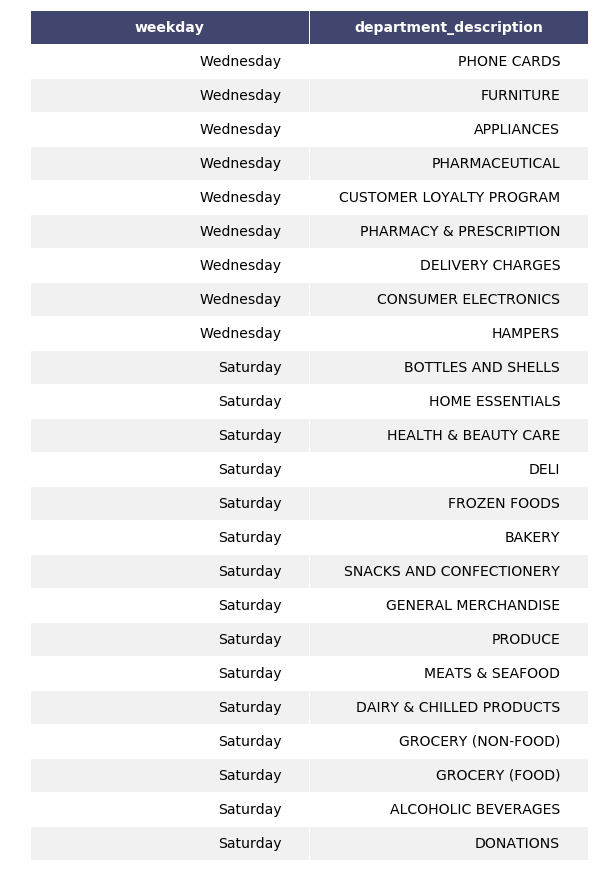

In [15]:
idx = dep_by_weekday.groupby(['department_description'],
                             sort=False)['item_cost'].transform(max) == dep_by_weekday['item_cost']

import six

def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

top_performers_by_weekday = (dep_by_weekday[idx].sort_values('weekday')[['weekday', 'department_description']])
top_performers_by_weekday['weekday'] = top_performers_by_weekday['weekday'].map(dayOfWeek)

render_mpl_table(top_performers_by_weekday, header_columns=0, col_width=5.0)
plt.savefig('TopPerformingDayByDepartment')



In [4]:
df['transaction_id'] = pd.factorize(df['transaction_number'].map(str) + df['invoice_number'].map(str))[0] + 1

In [47]:
totals = (df.loc[df['department_description'] != 'DONATIONS'].groupby(['department_description'], sort=False, as_index=False)
            .agg({'transaction_number':'nunique'})
            .rename(columns={'transaction_number':'total'}))
print(totals)

      department_description   total
0                     BAKERY  139107
1                    PRODUCE  170697
2   DAIRY & CHILLED PRODUCTS  151303
3               FROZEN FOODS   63188
4            MEATS & SEAFOOD  111219
5   SNACKS AND CONFECTIONERY  191418
6             GROCERY (FOOD)  279103
7         GROCERY (NON-FOOD)  132095
8                PHONE CARDS   21512
9        GENERAL MERCHANDISE   71126
10      HEALTH & BEAUTY CARE   59395
11        BOTTLES AND SHELLS   21412
12       ALCOHOLIC BEVERAGES   40725
13                      DELI   82251
14                 FURNITURE     592
15                APPLIANCES    1666
16           HOME ESSENTIALS    4504
17            PHARMACEUTICAL   35984
18  CUSTOMER LOYALTY PROGRAM    1069
19      CONSUMER ELECTRONICS     396
20   PHARMACY & PRESCRIPTION   15500
21                   HAMPERS      43
22          DELIVERY CHARGES      98


In [50]:
df = df.merge(right=totals, how='left')

In [51]:
hourly_dep = (df.groupby(['department_description', 'hour'], sort=False, as_index=False)
                .agg({'transaction_number':'nunique'}))
hourly_dep = hourly_dep.merge(right=totals, how='left')
hourly_dep['transaction_number'] = hourly_dep['transaction_number'] / hourly_dep['total']
hourly_dep = hourly_dep.drop('total', axis=1)

In [52]:
hourly_dep =hourly_dep.pivot_table(index='department_description', columns='hour').fillna(0)

In [53]:
hourly_dep

transaction_number                                \
hour                                  06:00     07:00     08:00     09:00   
department_description                                                      
ALCOHOLIC BEVERAGES                0.000000  0.003094  0.037618  0.058048   
APPLIANCES                         0.000000  0.003601  0.030612  0.056423   
BAKERY                             0.000000  0.003522  0.053283  0.071592   
BOTTLES AND SHELLS                 0.000000  0.002522  0.040118  0.063142   
CONSUMER ELECTRONICS               0.000000  0.005051  0.022727  0.068182   
CUSTOMER LOYALTY PROGRAM           0.000000  0.000000  0.027128  0.078578   
DAIRY & CHILLED PRODUCTS           0.000000  0.003543  0.049120  0.072180   
DELI                               0.000024  0.002383  0.035100  0.041118   
DELIVERY CHARGES                   0.000000  0.030612  0.071429  0.020408   
DONATIONS                          0.000000  0.000000  0.000000  0.000000   
FROZEN FOODS                       0.000000  0.002564  0.039754  0.062369   
FURNITURE                          0.000000  0.001689  0.050676  0.054054   
GENERAL MERCHANDISE                0.000000  0.007030  0.085384  0.103042   
GROCERY (FOOD)                     0.000018  0.004955  0.066011  0.083754   
GROCERY (NON-FOOD)                 0.000008  0.003838  0.052561  0.076975   
HAMPERS                            0.000000  0.000000  0.093023  0.069767   
HEALTH & BEAUTY CARE               0.000017  0.002677  0.042613  0.068289   
HOME ESSENTIALS                    0.000000  0.002664  0.036634  0.070826   
MEATS & SEAFOOD                    0.000000  0.003812  0.050405  0.077226   
PHARMACEUTICAL                     0.000000  0.001278  0.054163  0.074644   
PHARMACY & PRESCRIPTION            0.000000  0.001871  0.058581  0.079484   
PHONE CARDS                        0.000000  0.004184  0.059130  0.077678   
PRODUCE                            0.000012  0.003427  0.051383  0.073838   
SNACKS AND CONFECTIONERY           0.000021  0.003720  0.050267  0.069048   

                                                                            \
hour                         10:00     11:00     12:00     13:00     14:00   
department_description                                                       
ALCOHOLIC BEVERAGES       0.076931  0.092474  0.100233  0.090264  0.084665   
APPLIANCES                0.095438  0.087635  0.103241  0.091236  0.081032   
BAKERY                    0.084791  0.102022  0.115918  0.102626  0.098773   
BOTTLES AND SHELLS        0.080002  0.095647  0.100411  0.088642  0.083318   
CONSUMER ELECTRONICS      0.088384  0.108586  0.111111  0.095960  0.080808   
CUSTOMER LOYALTY PROGRAM  0.093545  0.095416  0.101964  0.103835  0.084191   
DAIRY & CHILLED PRODUCTS  0.087764  0.101617  0.106402  0.094876  0.090633   
DELI                      0.064388  0.132740  0.197821  0.137433  0.105360   
DELIVERY CHARGES          0.051020  0.142857  0.091837  0.142857  0.071429   
DONATIONS                 0.000000  0.000000  0.000000  0.000000  0.000000   
FROZEN FOODS              0.079271  0.094986  0.100605  0.091774  0.089052   
FURNITURE                 0.094595  0.113176  0.103041  0.087838  0.103041   
GENERAL MERCHANDISE       0.114304  0.122684  0.117074  0.095535  0.080224   
GROCERY (FOOD)            0.097666  0.115964  0.129089  0.112278  0.104144   
GROCERY (NON-FOOD)        0.093645  0.106613  0.107430  0.096362  0.089390   
HAMPERS                   0.023256  0.023256  0.093023  0.139535  0.023256   
HEALTH & BEAUTY CARE      0.081960  0.096607  0.098140  0.088677  0.081051   
HOME ESSENTIALS           0.084369  0.089698  0.106794  0.090586  0.086146   
MEATS & SEAFOOD           0.093455  0.102536  0.100684  0.089967  0.086001   
PHARMACEUTICAL            0.089595  0.098433  0.097154  0.086566  0.079452   
PHARMACY & PRESCRIPTION   0.089097  0.098452  0.095161  0.076065  0.080516   
PHONE CARDS               0.087254  0.093297  0.099479  0.091251  0.08511

In [54]:
trace = go.Heatmap(z= hourly_dep.values.tolist(),
                  y=hourly_dep.index,
                  x=hourly_dep.columns.map(lambda x: x[1]))
data=[trace]
py.iplot(data, filename='labelled-heatmap')